# Installs

In [ ]:
!pip install scanpy

     |████████████████████████████████| 10.2MB 3.7MB/s 
     |████████████████████████████████| 122kB 23.9MB/s 
     |████████████████████████████████| 71kB 5.0MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
  Created wheel for sinfo: filename=sinfo-0.3.1-cp36-none-any.whl size=7018 sha256=9fb831856ab925f46af41d519de2a09b8841aa7a524a742495c5883cb98327ac
  Stored in directory: /root/.cache/pip/wheels/11/f0/23/347d6d8e59787c2bc272162d18223dc3b45bd6dc40aceee6af
Successfully built sinfo


In [ ]:
!pip3 install leidenalg

     |████████████████████████████████| 2.4MB 6.0MB/s 
     |████████████████████████████████| 3.2MB 36.2MB/s 


In [ ]:
!pip install MulticoreTSNE

  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp36-cp36m-linux_x86_64.whl size=68503 sha256=fd991b8e165a6cf3551447e0be721a3a3cbc213cdcd2ca9cddfffadb05099273
  Stored in directory: /root/.cache/pip/wheels/27/59/53/3b52ee63add3692254c30d687fa4dff4d128d0557861fb028e
Successfully built MulticoreTSNE


## Imputation Tool

In [ ]:
!pip install deepimpute

  Created wheel for deepimpute: filename=deepimpute-1.2-cp36-none-any.whl size=10192 sha256=ffc4e53cef48e2b559f6e141b49627164ca62ad216ea6b6e11e89d24831507e6
  Stored in directory: /root/.cache/pip/wheels/25/ab/5e/2eb8736cbd98198f212def7fdfaf611ff33407b64f8820a2e7
Successfully built deepimpute


# 3K PBMC Import

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [ ]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.6.1 anndata==0.7.5 umap==0.4.6 numpy==1.19.5 scipy==1.4.1 pandas==1.1.5 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.8.3 leidenalg==0.8.3


In [ ]:
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results


In [ ]:
!mkdir data
!wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O data/pbmc3k_filtered_gene_bc_matrices.tar.gz
!cd data; tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz
!mkdir write

--2021-01-15 23:45:37--  http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz [following]
--2021-01-15 23:45:37--  https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7621991 (7.3M) [application/x-tar]
Saving to: ‘data/pbmc3k_filtered_gene_bc_matrices.tar.gz’

data/pbmc3k_filtere 100%[===================>]   7.27M  --.-KB/s    in 0.1s    

2021-01-15 23:45:37 (70.4 MB/s) - ‘data/pbmc3k_filtered_gene_bc_matri

In [ ]:
pbmc = sc.read_10x_mtx('data/filtered_gene_bc_matrices/hg19/', var_names= 'gene_symbols',
                       cache = True)

... writing an h5ad cache file to speedup reading next time


In [ ]:
#dropout imputation on R DrImpute

# Drop out Imputation

In [ ]:
from deepimpute.multinet import MultiNet

PBMC = pbmc.transpose().to_df()

In [ ]:
print("working on {} cells and {} genes".format(*PBMC.shape))

working on 32738 cells and 2700 genes


In [ ]:
# Using default parameters
multinet = MultiNet() 

# Using custom parameters
NN_params = {
        'learning_rate': 1e-4,
        'batch_size': 64,
        'max_epochs': 200,
        'ncores': 5,
        'sub_outputdim': 512,
        'architecture': [
            {"type": "dense", "activation": "relu", "neurons": 200},
            {"type": "dropout", "activation": "dropout", "rate": 0.3}]
    }

multinet = MultiNet(**NN_params)

Using all the cores (2)


In [ ]:
# Using all the data
multinet.fit(PBMC,cell_subset=1,minVMR=0.5)

Input dataset is 32738 cells (rows) and 2700 genes (columns)
First 3 rows and columns:
            AAACATACAACCAC-1  AAACATTGAGCTAC-1  AAACATTGATCAGC-1
MIR1302-10               0.0               0.0               0.0
FAM138A                  0.0               0.0               0.0
OR4F5                    0.0               0.0               0.0
3072 genes selected for imputation
Net 0: 715 predictors, 512 targets
Net 1: 731 predictors, 512 targets
Net 2: 731 predictors, 512 targets
Net 3: 726 predictors, 512 targets
Net 4: 736 predictors, 512 targets
Net 5: 708 predictors, 512 targets
Normalization
Building network
[{'type': 'dense', 'activation': 'relu', 'neurons': 200}, {'type': 'dropout', 'activation': 'dropout', 'rate': 0.3}]
Fitting with 32738 cells
Epoch 1/200
486/486 [==============================] - 11s 23ms/step - loss: 0.1138 - dense_18_loss: 0.0188 - dense_19_loss: 0.0195 - dense_20_loss: 0.0189 - dense_21_loss: 0.0189 - dense_22_loss: 0.0186 - dense_23_loss: 0.0191 - val_l

In [ ]:
imputedData = multinet.predict(PBMC)

Filling zeros


In [ ]:
PBMC.shape

(32738, 2700)

In [ ]:

imputedData.shape

(32738, 2700)

# Filter lncRNA

In [ ]:
lncF = 'https://raw.githubusercontent.com/josoga2/dataset-repos/main/lncTest/genes.tsv'
lnc = pd.read_csv(lncF, sep='\t', header=None)
lnc.columns = ['gene','name']
lnc.head(1)

,gene,name
0,ENSG00000237613,FAM138A


In [ ]:
#pbmc.to_df().transpose().to_csv('PBMC.tsv', sep='\t')
#PBMC = pd.read_csv('PBMC.tsv', sep='\t')


In [ ]:
pbmcLNC = pd.merge(imputedData, lnc, left_on=imputedData.index, right_on='name', how='inner')

In [ ]:
pbmcLNC = pbmcLNC.set_index('name')
pbmcLNC = pbmcLNC.drop('gene', axis=1)
pbmcLNC.head(5)

,AAACATACAACCAC-1,AAACATTGAGCTAC-1,AAACATTGATCAGC-1,AAACCGTGCTTCCG-1,AAACCGTGTATGCG-1,AAACGCACTGGTAC-1,AAACGCTGACCAGT-1,AAACGCTGGTTCTT-1,AAACGCTGTAGCCA-1,AAACGCTGTTTCTG-1,AAACTTGAAAAACG-1,AAACTTGATCCAGA-1,AAAGAGACGAGATA-1,AAAGAGACGCGAGA-1,AAAGAGACGGACTT-1,AAAGAGACGGCATT-1,AAAGATCTGGGCAA-1,AAAGCAGAAGCCAT-1,AAAGCAGATATCGG-1,AAAGCCTGTATGCG-1,AAAGGCCTGTCTAG-1,AAAGTTTGATCACG-1,AAAGTTTGGGGTGA-1,AAAGTTTGTAGAGA-1,AAAGTTTGTAGCGT-1,AAATCAACAATGCC-1,AAATCAACACCAGT-1,AAATCAACCAGGAG-1,AAATCAACCCTATT-1,AAATCAACGGAAGC-1,AAATCAACTCGCAA-1,AAATCATGACCACA-1,AAATCCCTCCACAA-1,AAATCCCTGCTATG-1,AAATGTTGAACGAA-1,AAATGTTGCCACAA-1,AAATGTTGTGGCAT-1,AAATTCGAAGGTTC-1,AAATTCGAATCACG-1,AAATTCGAGCTGAT-1,...,TTGAGGTGGACGGA-1,TTGCATTGAGCTAC-1,TTGCATTGCTAAGC-1,TTGCATTGTGACTG-1,TTGCTAACACCAAC-1,TTGCTAACACGCTA-1,TTGCTAACCACTCC-1,TTGCTATGGTACGT-1,TTGCTATGGTAGGG-1,TTGGAGACCAATCG-1,TTGGAGACGCTATG-1,TTGGAGACTATGGC-1,TTGGGAACTGAACC-1,TTGGTACTACTGGT-1,TTGGTACTCTTAGG-1,TTGGTACTGAATCC-1,TTGGTACTGGATTC-1,TTGTACACGTTGTG-1,TTGTACACTTGCAG-1,TTGTAGCTAGCTCA-1,TTGTAGCTCTCTTA-1,TTGTCATGGACGGA-1,TTTAGAGATCCTCG-1,TTTAGCTGATACCG-1,TTTAGCTGGATACC-1,TTTAGCTGTACTCT-1,TTTAGGCTCCTTTA-1,TTTATCCTGTTGTG-1,TTTCACGAGGTTCA-1,TTTCAGTGGAAGGC-1,TTTCAGTGTCACGA-1,TTTCAGTGTCTATC-1,TTTCAGTGTGCAGT-1,TTTCCAGAGGTGAG-1,TTTCGAACACCTGA-1,TTTCGAACTCTCAT-1,TTTCTACTGAGGCA-1,TTTCTACTTCCTCG-1,TTTGCATGAGAGGC-1,TTTGCATGCCTCAC-1
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FAM138A,1.051375,1.094776,1.041122,1.012109,1.020077,1.041086,1.043238,1.085669,1.010445,0.94552,1.037511,1.032543,1.043557,1.045978,1.01458,0.0,1.009635,0.0,1.054218,1.038609,1.079179,1.052738,1.138121,1.041371,1.013528,1.014507,1.038058,1.091543,1.119173,1.122396,1.118023,1.060843,0.999905,0.0,1.020711,1.077714,0.989731,1.047639,1.049789,1.010465,...,1.017364,1.074102,1.029697,1.040689,1.021965,1.007296,1.048126,1.013284,1.02007,1.101926,1.038613,1.066953,1.05908,1.027665,1.04661,1.016346,1.002558,1.034549,1.015062,1.026438,1.056071,1.010314,1.059176,1.05583,1.032844,1.045382,1.00282,1.021569,1.056668,1.020402,0.998492,0.993913,1.017257,1.023695,1.106909,1.047195,1.055243,1.023848,1.007292,1.025336
RP11-34P13.7,1.051375,1.094776,1.041122,1.012109,1.020077,1.041086,1.043238,1.085669,1.010445,0.94552,1.037511,1.032543,1.043557,1.045978,1.01458,0.0,1.009635,0.0,1.054218,1.038609,1.079179,1.052738,1.138121,1.041371,1.013528,1.014507,1.038058,1.091543,1.119173,1.122396,1.118023,1.060843,0.999905,0.0,1.020711,1.077714,0.989731,1.047639,1.049789,1.010465,...,1.017364,1.074102,1.029697,1.040689,1.021965,1.007296,1.048126,1.013284,1.02007,1.101926,1.038613,1.066953,1.05908,1.027665,1.04661,1.016346,1.002558,1.034549,1.015062,1.026438,1.056071,1.010314,1.059176,1.05583,1.032844,1.045382,1.00282,1.021569,1.056668,1.020402,0.998492,0.993913,1.017257,1.023695,1.106909,1.047195,1.055243,1.023848,1.007292,1.025336
RP11-34P13.8,1.051375,1.094776,1.041122,1.012109,1.020077,1.041086,1.043238,1.085669,1.010445,0.94552,1.037511,1.032543,1.043557,1.045978,1.01458,0.0,1.009635,0.0,1.054218,1.038609,1.079179,1.052738,1.138121,1.041371,1.013528,1.014507,1.038058,1.091543,1.119173,1.122396,1.118023,1.060843,0.999905,0.0,1.020711,1.077714,0.989731,1.047639,1.049789,1.010465,...,1.017364,1.074102,1.029697,1.040689,1.021965,1.007296,1.048126,1.013284,1.02007,1.101926,1.038613,1.066953,1.05908,1.027665,1.04661,1.016346,1.002558,1.034549,1.015062,1.026438,1.056071,1.010314,1.059176,1.05583,1.032844,1.045382,1.00282,1.021569,1.056668,1.020402,0.998492,0.993913,1.017257,1.023695,1.106909,1.047195,1.055243,1.023848,1.007292,1.025336
RP11-34P13.14,1.051375,1.094776,1.041122,1.012109,1.020077,1.041086,1.043238,1.085669,1.010445,0.94552,1.037511,1.032543,1.043557,1.045978,1.01458,0.0,1.009635,0.0,1.054218,1.038609,1.079179,1.052738,1.138121,1.041371,1.013528,1.014507,1.038058,1.091543,1.119173,1.122396,1.118023,1.060843,0.999905,0.0,1.020711,1.077714,0.989731,1.047639,1.049789,1.010465,...,1.017364,1.074102,1.029697,1.040689,1.021965,1.0

In [ ]:
PBMC.shape

(32738, 2700)

In [ ]:
pbmcLNC.shape

(11690, 2700)

# Convert to AnnDAta

In [ ]:
#imputation
adata = sc.AnnData(X= pbmcLNC)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [ ]:
# not needed after data imputation
#adata = sc.AnnData(X=pbmcLNC)
adata = adata.T

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [ ]:
adata.var_names_make_unique()

In [ ]:
adata

AnnData object with n_obs × n_vars = 2700 × 11690

# Preprocessing

Selection of highly variable genes per cell

normalizing counts per cell
    finished (0:00:00)


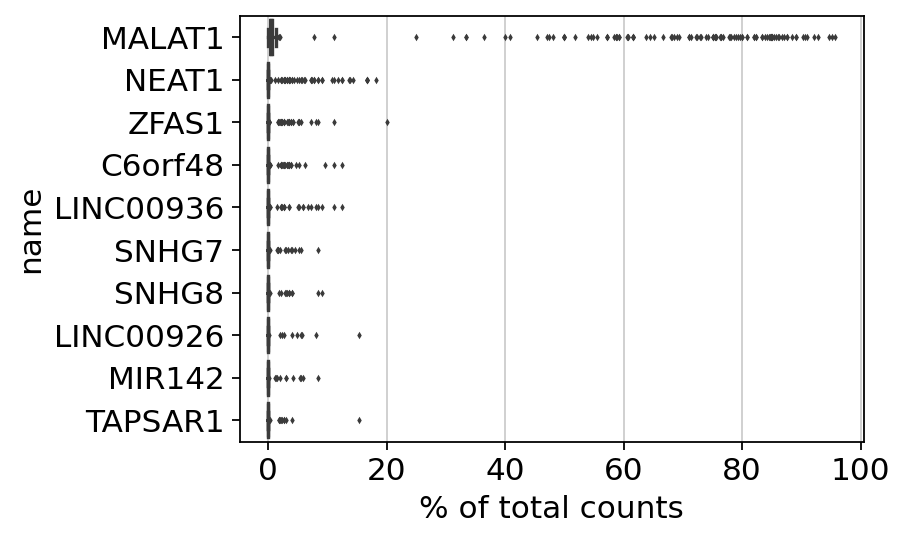

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=10)

In [ ]:
sc.pp.filter_cells(adata, min_genes=500)

filtered out 114 cells that have less than 500 genes expressed


In [ ]:
sc.pp.filter_genes(adata, min_cells=3)

In [ ]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [ ]:
adata

AnnData object with n_obs × n_vars = 2586 × 11690
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

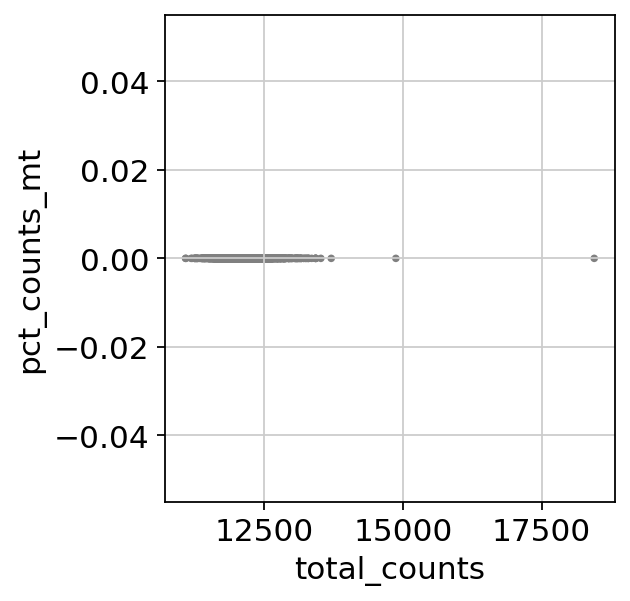

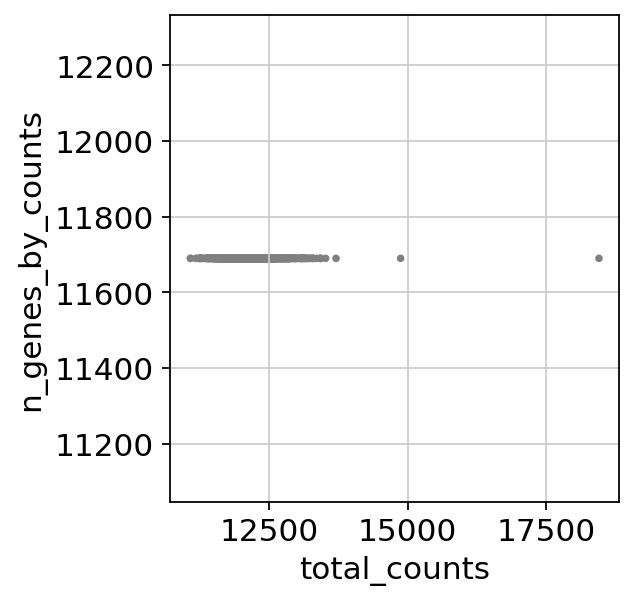

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')


In [ ]:
#Removing unwanted data of interest (mitochondiral genes and bad cells)

#adata = adata[adata.obs.n_genes_by_counts < 910, :]
adata = adata[adata.obs.total_counts < 14000]


In [ ]:
adata

View of AnnData object with n_obs × n_vars = 2584 × 11690
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

# Select Highly Variable Data

In [ ]:
#normalize total count data btw 1E0 - 1E4
sc.pp.normalize_total(adata, target_sum=14000)
#log of counts
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [ ]:
import seaborn as sns

In [ ]:
sns.set('paper', color_codes='CST3')

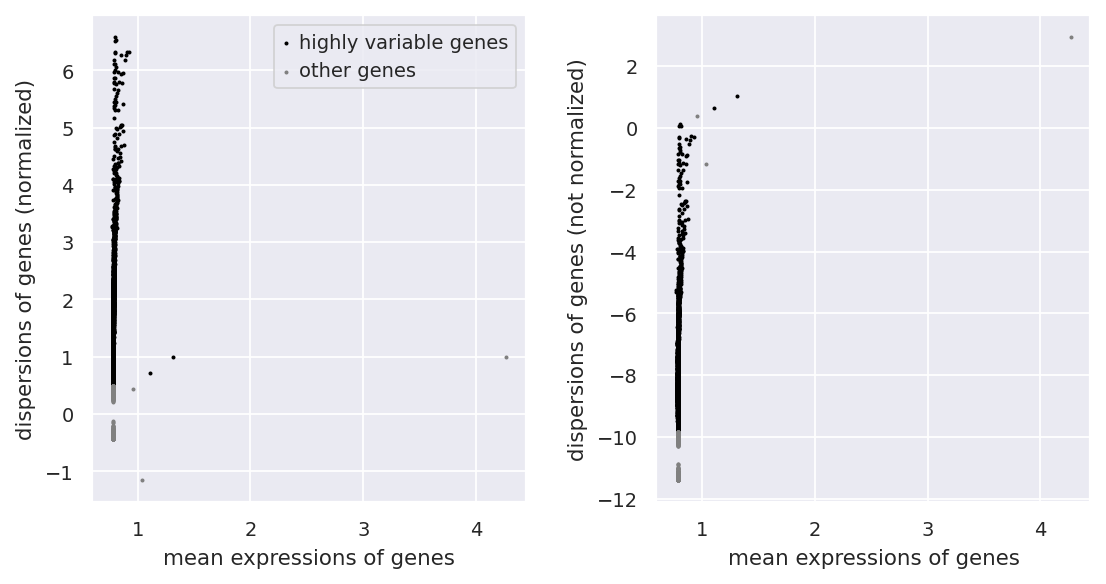

In [ ]:
sc.pl.highly_variable_genes(adata)

In [ ]:
adata

AnnData object with n_obs × n_vars = 2584 × 11690
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [ ]:
adata.raw = adata

In [ ]:
adata = adata[:, adata.var.highly_variable]

In [ ]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


    finished (0:00:11)


In [ ]:
sc.pp.scale(adata, max_value=10)

In [ ]:
adata

AnnData object with n_obs × n_vars = 2584 × 2164
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [ ]:
#Extract data for 

# Visualization & Clustering

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [ ]:
sc.tl.pca(adata, svd_solver='arpack')


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


In [ ]:
adata.var.highly_variable.head()

name
RP11-206L10.9    True
FAM87B           True
LINC00115        True
FAM41C           True
RP11-54O7.17     True
Name: highly_variable, dtype: bool

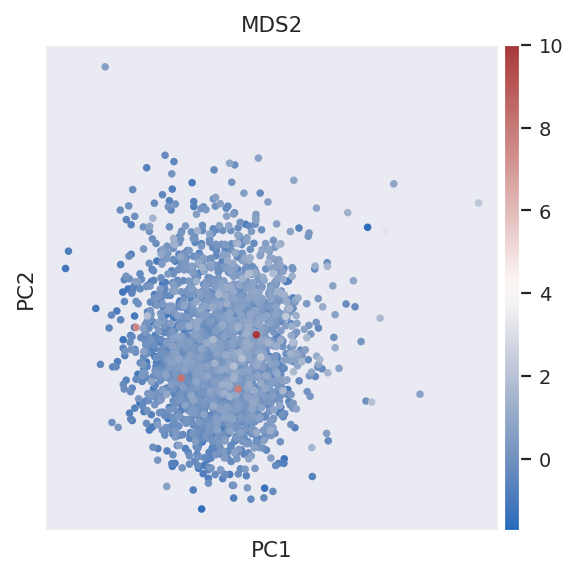

In [ ]:
sc.pl.pca(adata, color='MDS2', color_map='vlag')


In [ ]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


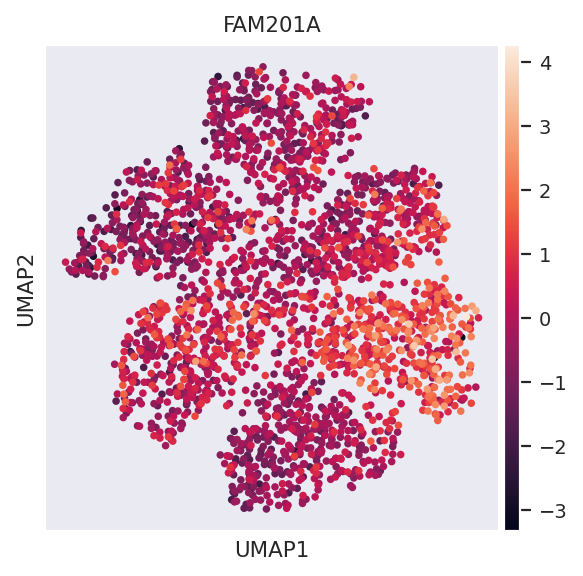

In [ ]:
sc.pl.umap(adata, color=['FAM201A'], use_raw=False)

In [ ]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

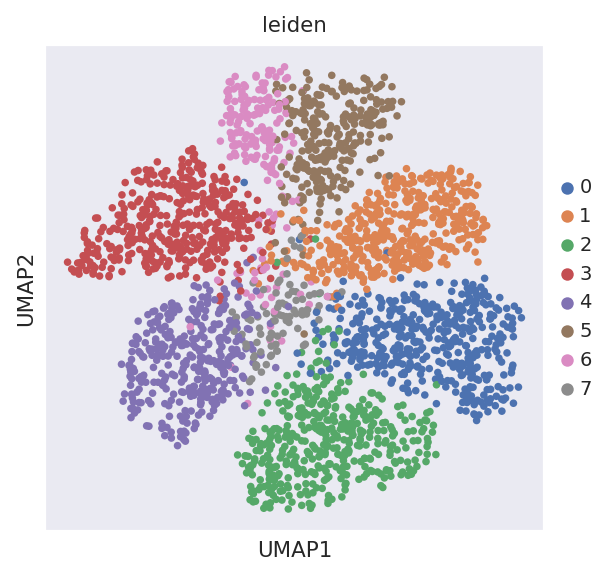

In [ ]:
sc.pl.umap(adata, color=['leiden'])

In [ ]:
adata.write(results_file)

# Using Highly Variable Marker genes to profile individual cells

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


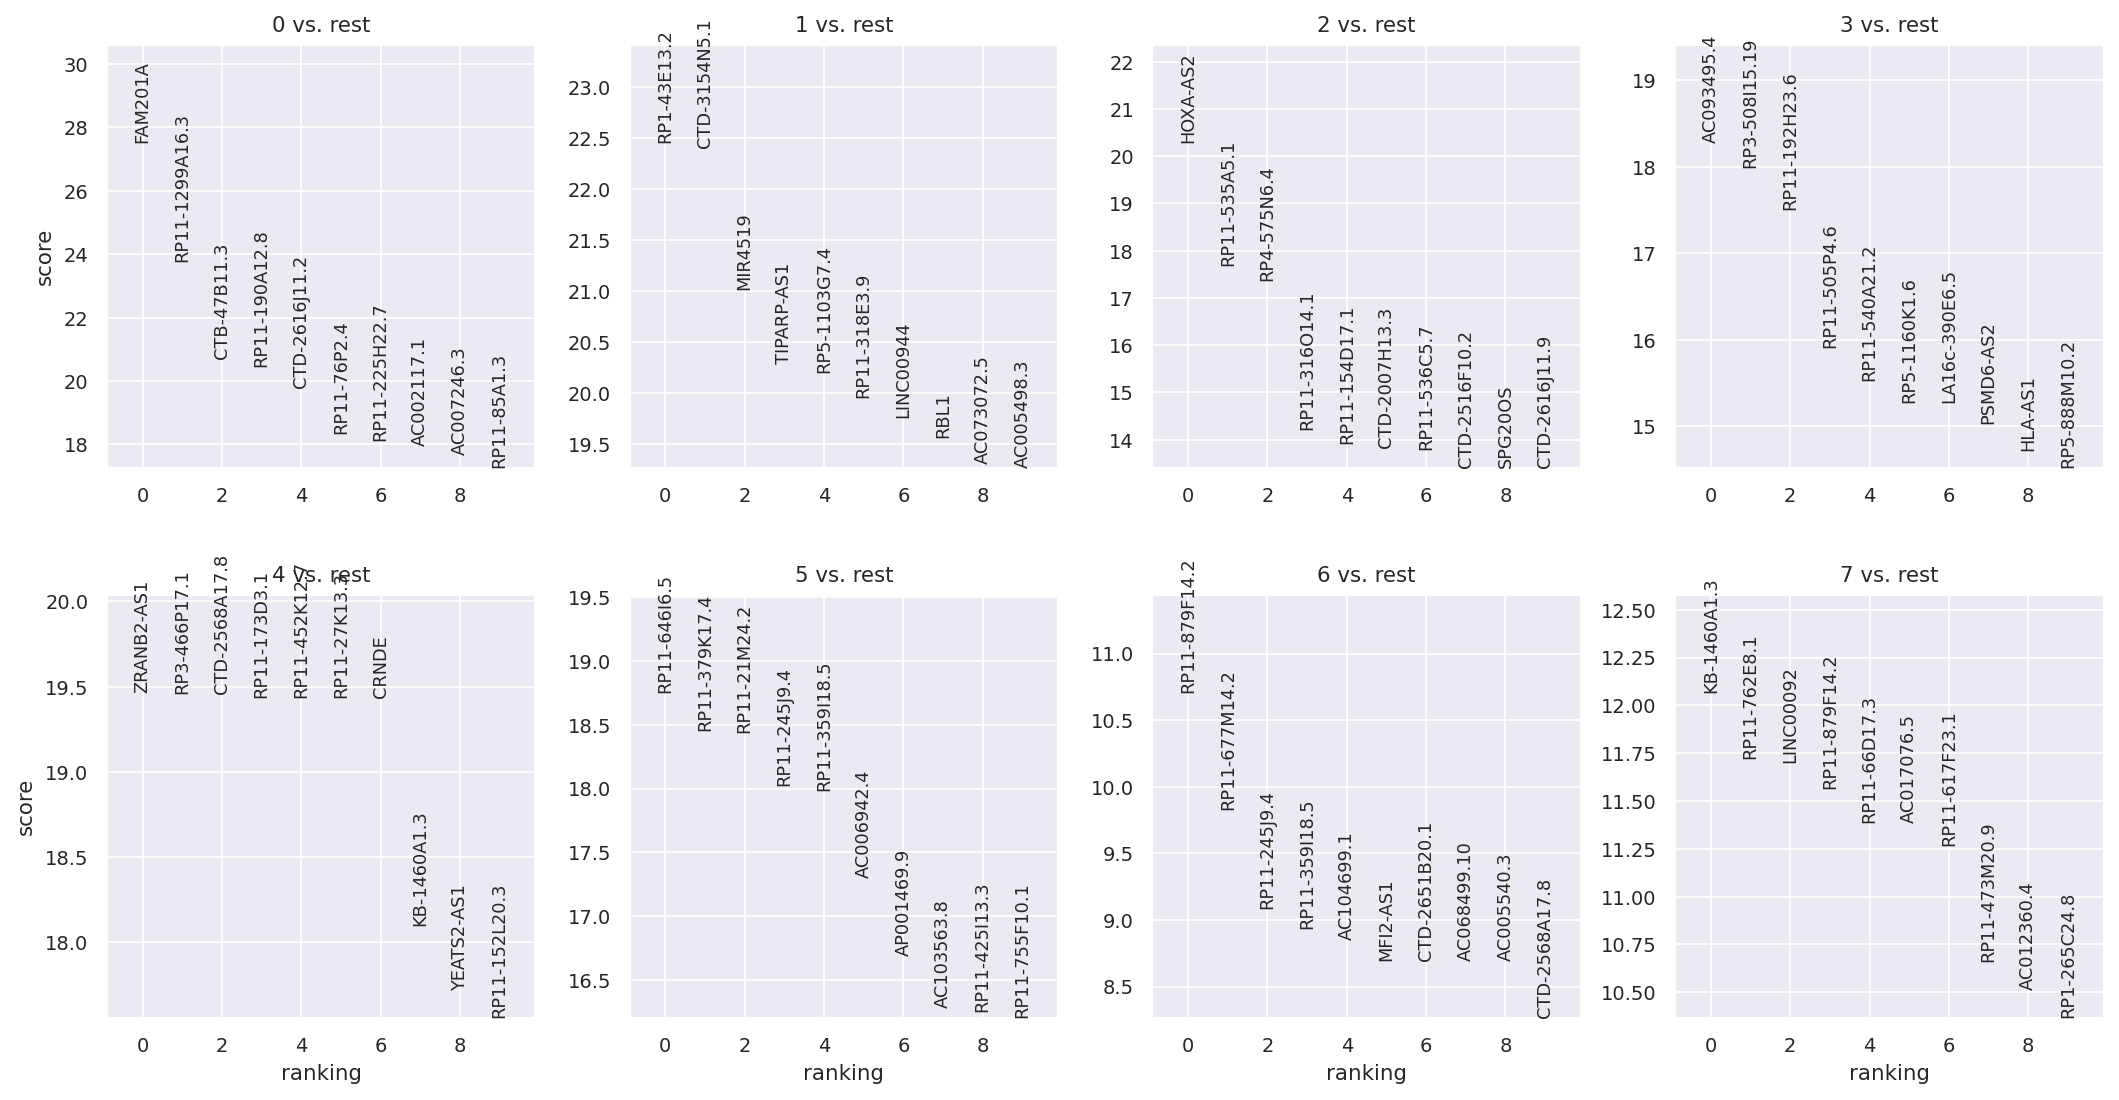

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

In [ ]:
adata.write(results_file)

In [ ]:
# USING tSNE

sc.tl.tsne(adata, perplexity=30, learning_rate=1000, random_state=0)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:19)


In [ ]:
adata.write(results_file)

In [ ]:
adata

AnnData object with n_obs × n_vars = 2584 × 2164
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'neighbors', 'pca', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

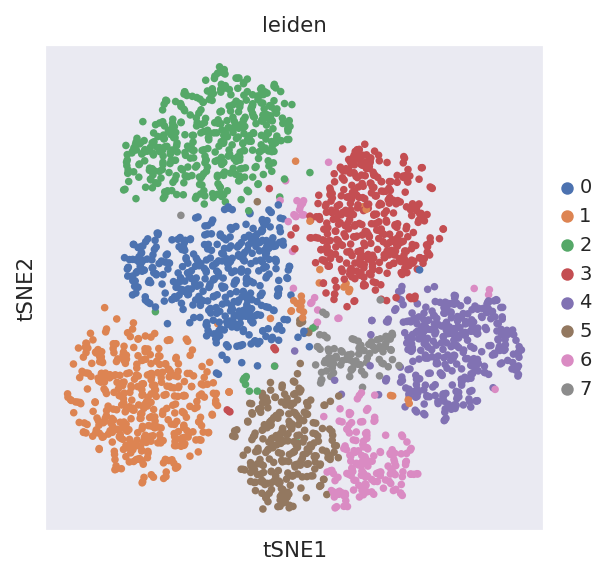

In [ ]:
sc.pl.tsne(adata, color='leiden')

In [ ]:
cell_clusters = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
cell_clusters.head(10).to_csv('topTen')
cell_clusters.head()

,0,1,2,3,4,5,6,7
0,FAM201A,RP1-43E13.2,HOXA-AS2,AC093495.4,ZRANB2-AS1,RP11-646I6.5,RP11-879F14.2,KB-1460A1.3
1,RP11-1299A16.3,CTD-3154N5.1,RP11-535A5.1,RP3-508I15.19,RP3-466P17.1,RP11-379K17.4,RP11-677M14.2,RP11-762E8.1
2,CTB-47B11.3,MIR4519,RP4-575N6.4,RP11-192H23.6,CTD-2568A17.8,RP11-21M24.2,RP11-245J9.4,LINC00092
3,RP11-190A12.8,TIPARP-AS1,RP11-316O14.1,RP11-505P4.6,RP11-173D3.1,RP11-245J9.4,RP11-359I18.5,RP11-879F14.2
4,CTD-2616J11.2,RP5-1103G7.4,RP11-154D17.1,RP11-540A21.2,RP11-452K12.7,RP11-359I18.5,AC104699.1,RP11-66D17.3


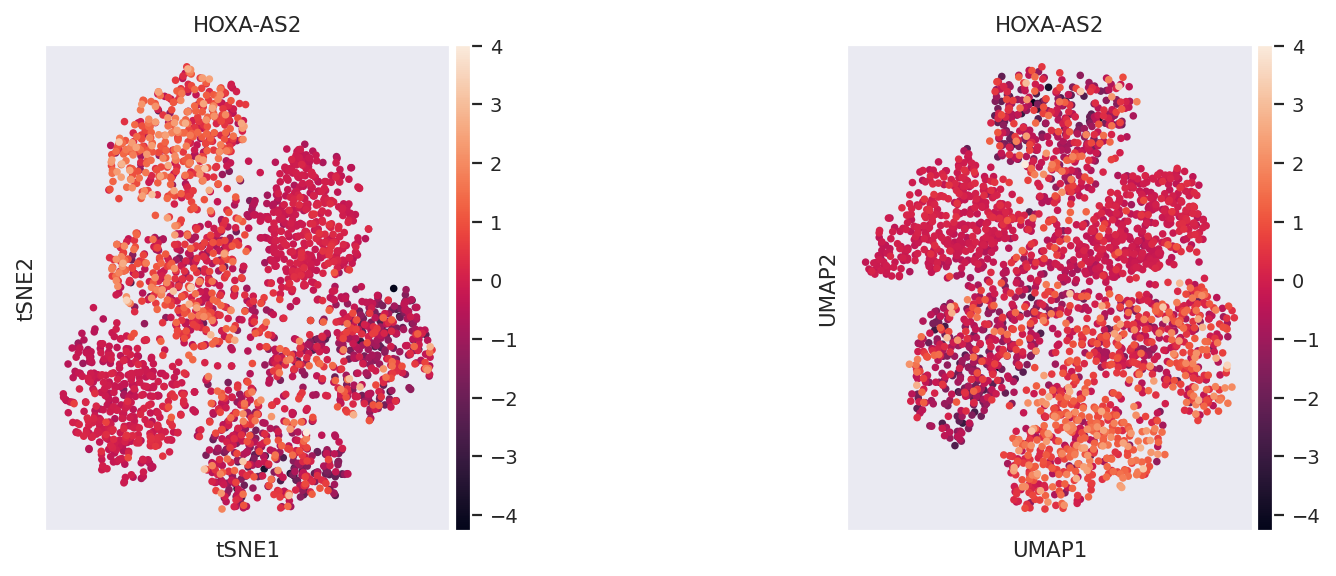

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'wspace':0.8})
ax1_dict = sc.pl.tsne(adata, color='HOXA-AS2', ax=ax1, show=False)
ax2_dict = sc.pl.umap(adata, color='HOXA-AS2', ax=ax2, show=False)

In [ ]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
rankSheet = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})

rankSheet.head(1)

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,5_n,5_p,6_n,6_p,7_n,7_p
0,FAM201A,7.849408e-109,RP1-43E13.2,2.361058e-79,HOXA-AS2,6.050755e-70,AC093495.4,7.104174e-60,ZRANB2-AS1,1.435188e-77,RP11-646I6.5,1.141940e-52,RP11-879F14.2,8.619470e-25,KB-1460A1.3,6.438180e-29


In [ ]:
marker_genes_def = {'0':'FAM201A',
                    '1':'RP1-43E13.2',
                    '2':'HOXA-AS2',
                    '3':'AC093495.4',
                    '4':'RP3-466P17.1',
                    '5':'RP11-646I6.5',
                    '6':'RP11-677M14.2',
                    '7':'KB-1460A1.3'
                    }

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns["dendrogram_['leiden']"]`


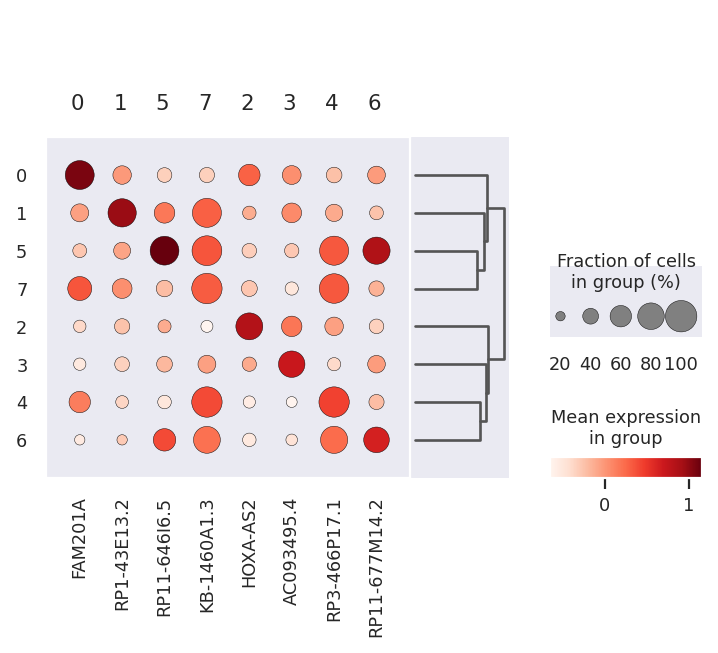

In [ ]:
rcParams['figure.figsize'] = 15,15
sc.pl.dotplot(adata, marker_genes_def, 'leiden', dendrogram=True, 
              save='dotplot.png', cmap='Reds')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


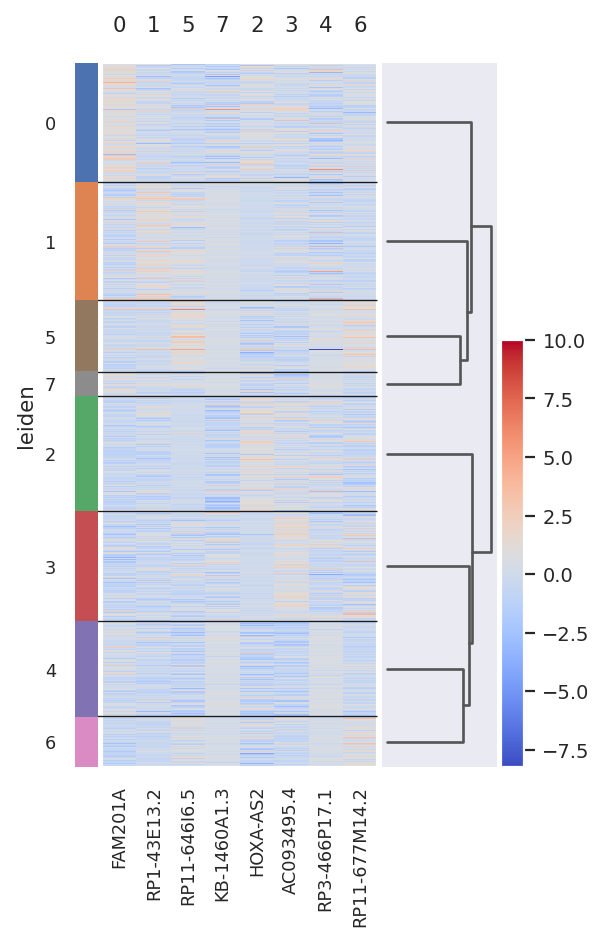

In [ ]:
sc.pl.heatmap(adata, marker_genes_def, groupby='leiden', cmap='coolwarm', 
              dendrogram=True)

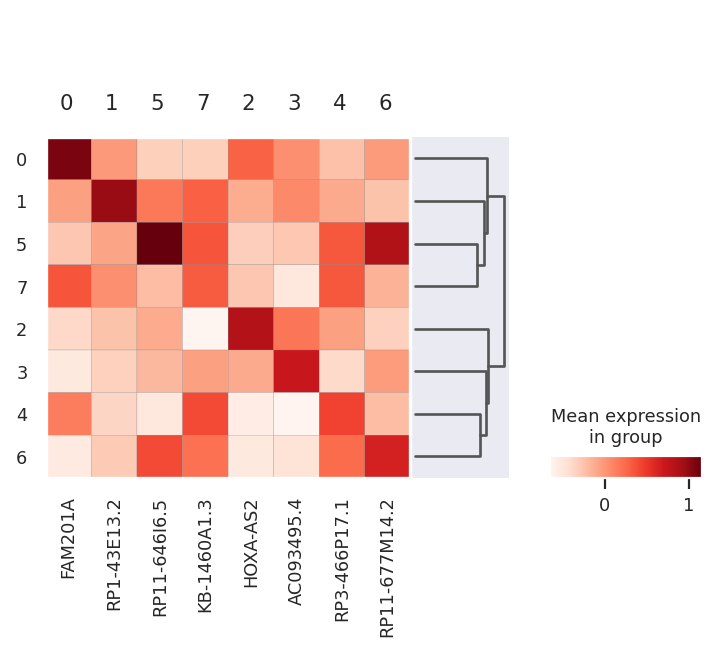

In [ ]:
rcParams['figure.figsize'] = 15,15
sc.pl.matrixplot(adata, marker_genes_def, 'leiden', dendrogram=True,
                 save='dotplot.png', 
                 cmap='Reds')

# Co-Expression Trials

## From norm Counts

In [ ]:
impPBMC = imputedData.transpose()
impPBMC.head(1)

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,OR4F29,RP4-669L17.2,RP5-857K21.15,RP5-857K21.1,RP5-857K21.2,RP5-857K21.3,RP5-857K21.4,RP5-857K21.5,OR4F16,RP11-206L10.3,RP11-206L10.5,RP11-206L10.4,RP11-206L10.2,RP11-206L10.9,AL669831.1,FAM87B,LINC00115,FAM41C,AL645608.2,RP11-54O7.16,RP11-54O7.1,RP11-54O7.2,RP11-54O7.3,SAMD11,AL645608.1,NOC2L,KLHL17,PLEKHN1,C1orf170,RP11-54O7.17,...,MT-CO1,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AL360154.1,AC109135.1,AC145212.1,MGC39584,AC018692.2,FRG2C-1,AL592170.1,AL356585.1,AC011043.1,ZNF84-1,ZNF26-1,AL603926.1,AL592183.1,AC011841.1,AL162851.1,BX072566.2,BX072566.1,AL354822.1,KIR2DL2,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACATACAACCAC-1,1.051375,1.051375,1.051375,1.051375,1.051375,1.066809,1.051375,1.051375,1.058973,1.051375,1.051375,1.051375,1.051375,1.051375,1.051375,1.051375,1.051375,1.051375,1.051375,1.051375,1.051375,1.051375,1.045642,1.066514,1.051375,1.048893,1.059474,1.051838,1.051375,1.051375,1.051375,1.051375,1.051375,1.051375,1.051375,1.249179,1.035435,1.087063,1.051375,1.035285,...,25.0,10.0,1.045709,6.0,5.0,1.0,1.174139,10.0,1.0,1.135847,4.0,1.051375,1.051375,1.103611,1.051375,1.051375,1.051375,1.051375,1.051375,1.051375,1.051375,1.051375,1.051375,1.232955,1.05606,1.051375,1.051375,1.051375,1.00343,1.051375,1.051375,1.051375,1.051375,1.026893,1.064238,1.051375,1.051375,1.051375,1.051375,1.051375


In [ ]:
cell_clusters.head(1)

,0,1,2,3,4,5,6,7
0,FAM201A,RP1-43E13.2,HOXA-AS2,AC093495.4,ZRANB2-AS1,RP11-646I6.5,RP11-879F14.2,KB-1460A1.3


In [ ]:
corrTab = impPBMC[['FAM201A',
                   'RP1-43E13.2',	
                   'HOXA-AS2',
                   'AC093495.4',
                   'ZRANB2-AS1',
                   'RP11-646I6.5',
                   'RP11-879F14.2',
                   'KB-1460A1.3',
                   'IL7R',	'CD14',	
                   'MS4A1',	'CD8A',	
                   'GNLY',	'FCGR3A',	
                   'FCER1A',	'PPBP'
                   ]]

In [ ]:
newCorrTab = impPBMC[[
                      "FAM201A", "RP1-43E13.2", "HOXA-AS2", "AC093495.4", "ZRANB2-AS1", "RP11-646I6.5", "RP11-879F14.2", "KB-1460A1.3",
"RP11-1299A16.3", "CTD-3154N5.1", "RP11-535A5.1", "RP3-508I15.19", "RP3-466P17.1", "RP11-379K17.4", "RP11-677M14.2", "RP11-762E8.1",
"CTB-47B11.3", "MIR4519", "RP4-575N6.4", "RP11-192H23.6", "CTD-2568A17.8", "RP11-21M24.2", "RP11-245J9.4", "LINC00092",
"RP11-190A12.8", "TIPARP-AS1", "RP11-316O14.1", "RP11-505P4.6", "RP11-173D3.1", "RP11-245J9.4", "RP11-359I18.5", "RP11-879F14.2",
"CTD-2616J11.2", "RP5-1103G7.4", "RP11-154D17.1", "RP11-540A21.2", "RP11-452K12.7", "RP11-359I18.5", "AC104699.1", "RP11-66D17.3",
"RP11-76P2.4", "RP11-318E3.9", "CTD-2007H13.3", "RP5-1160K1.6", "RP11-27K13.3", "AC006942.4", "MFI2-AS1", "AC017076.5",
"RP11-225H22.7", "LINC00944", "RP11-536C5.7", "LA16c-390E6.5", "CRNDE", "AP001469.9", "CTD-2651B20.1", "RP11-617F23.1",
"AC002117.1", "RBL1", "CTD-2516F10.2", "PSMD6-AS2", "KB-1460A1.3", "AC103563.8", "AC068499.10", "RP11-473M20.9",
"AC007246.3", "AC073072.5", "SPG20OS", "HLA-AS1", "YEATS2-AS1", "RP11-425I13.3", "AC005540.3", "AC012360.4",
"RP11-85A1.3", "AC005498.3", "CTD-2616J11.9", "RP5-888M10.2", "RP11-152L20.3", "RP11-755F10.1", "CTD-2568A17.8", "RP1-265C24.8",
"RPS12", "LYZ", "CD74", "CCL5", "NKG7", "LST1", "HLA-DPA1", "PF4",
"LDHB", "S100A9", "CD79A", "NKG7", "GZMB", "FCER1G", "HLA-DPB1", "SDPR",
"RPS25", "S100A8", "HLA-DRA", "B2M", "GNLY", "AIF1", "HLA-DRA", "GNG11",
"RPS27", "TYROBP", "CD79B", "CST7", "CTSW", "COTL1", "HLA-DRB1", "PPBP",
"RPS6", "FTL", "HLA-DPB1", "GZMA", "PRF1", "FCGR3A", "CD74", "NRGN"
]]

In [ ]:
corrTab.head(1)

,FAM201A,RP1-43E13.2,HOXA-AS2,AC093495.4,ZRANB2-AS1,RP11-646I6.5,RP11-879F14.2,KB-1460A1.3,IL7R,CD14,MS4A1,CD8A,GNLY,FCGR3A,FCER1A,PPBP
AAACATACAACCAC-1,1.075055,1.074948,1.051375,1.103832,1.057699,1.03865,1.161247,1.077527,3.0,1.002556,1.250684,1.0,2.450617,0.580888,1.14643,1.461678


In [ ]:
corMap = corrTab.corr(method='spearman')

In [ ]:
corMap.head(1)

,FAM201A,RP1-43E13.2,HOXA-AS2,AC093495.4,ZRANB2-AS1,RP11-646I6.5,RP11-879F14.2,KB-1460A1.3,IL7R,CD14,MS4A1,CD8A,GNLY,FCGR3A,FCER1A,PPBP
FAM201A,1.0,0.519425,0.616412,0.486739,0.627836,0.575583,0.407005,0.596767,0.267759,0.211753,0.20511,0.295371,0.152646,0.144616,0.314278,0.252503


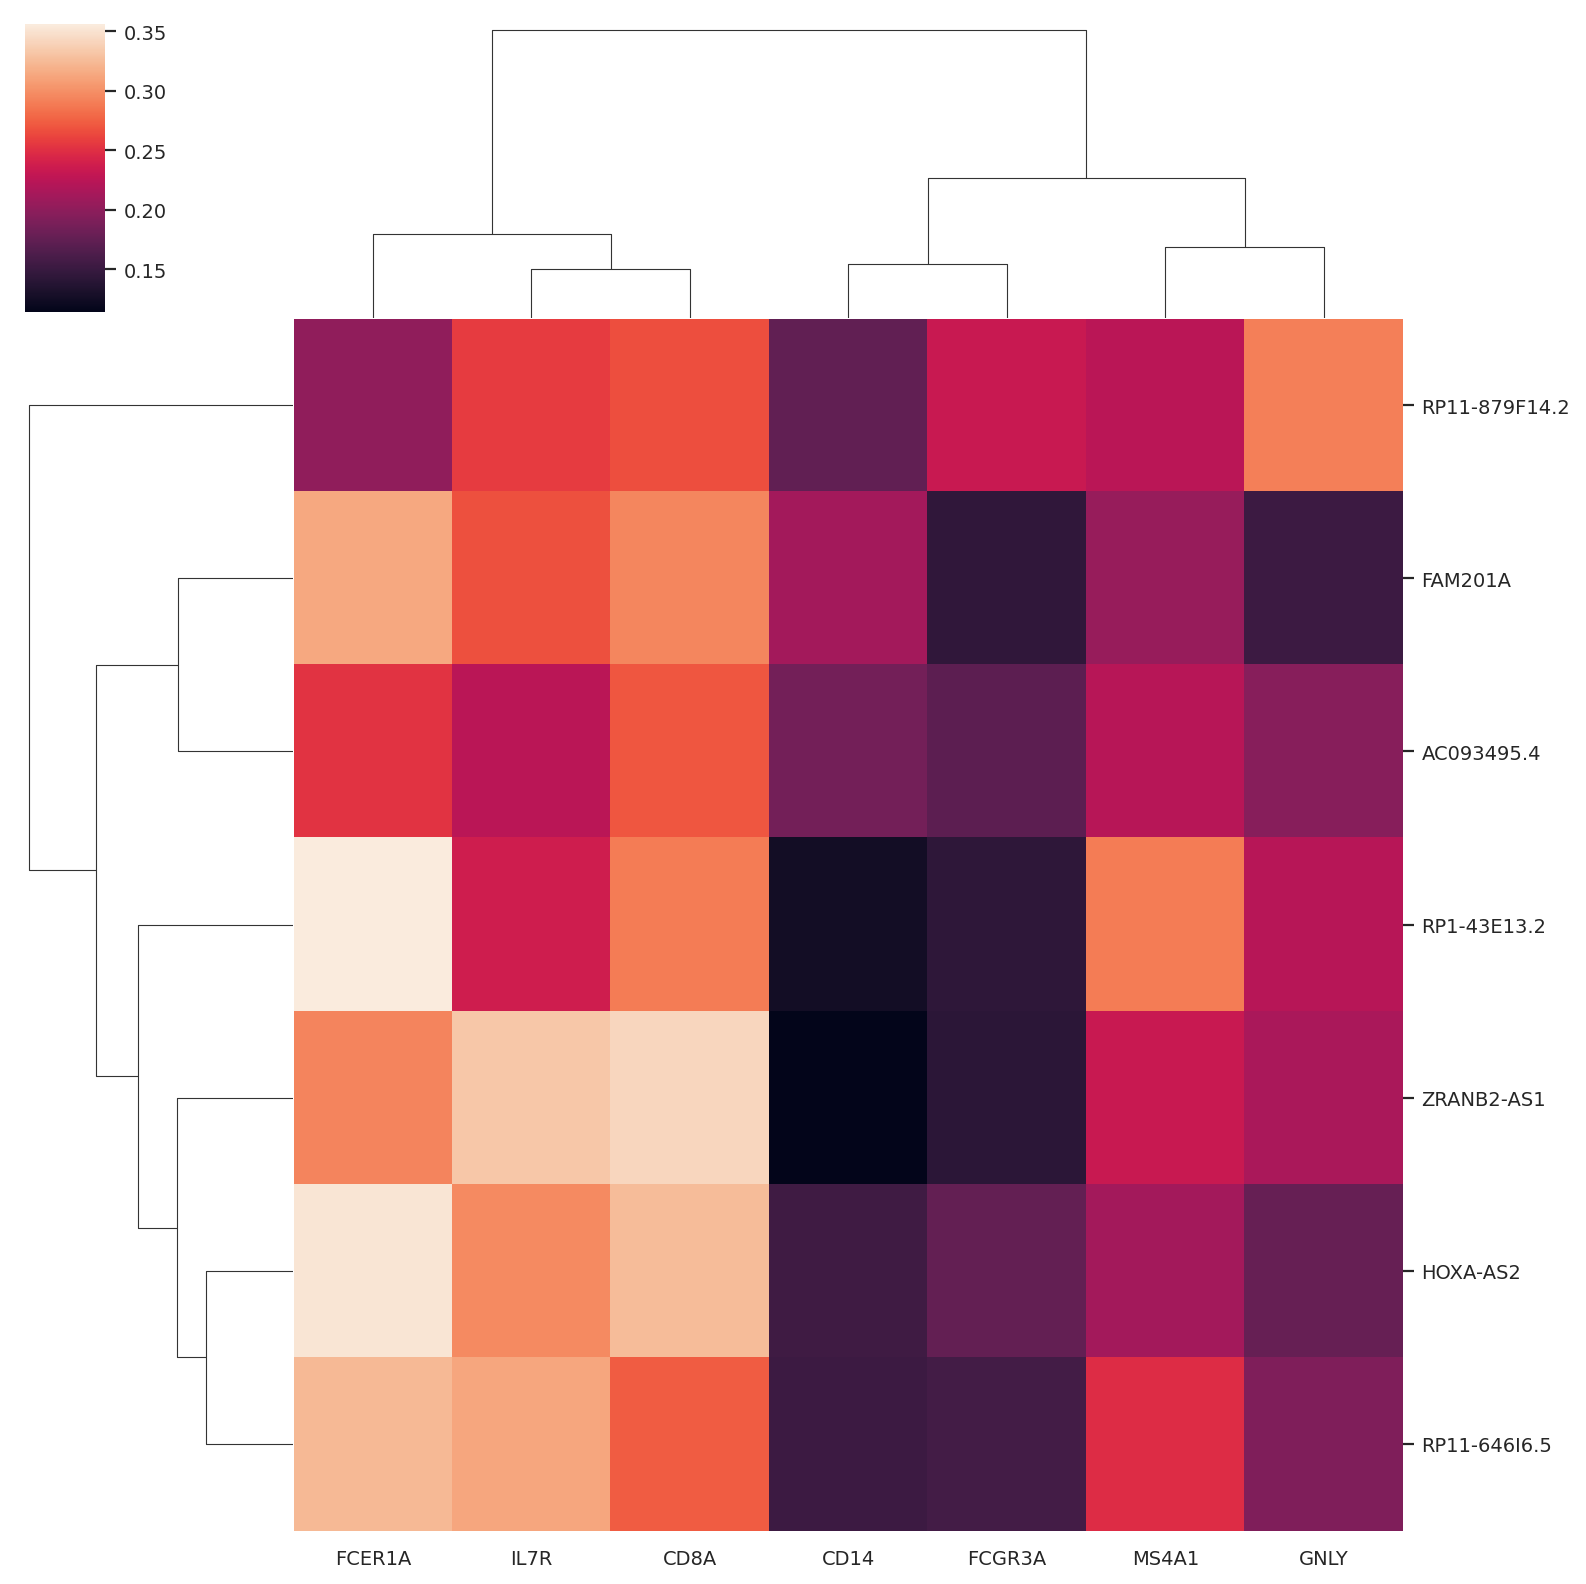

In [ ]:
pairWise = corMap.iloc[0:7,8:15]
rcParams['figure.figsize'] = 4,4
sns.clustermap(pairWise, method='ward')

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


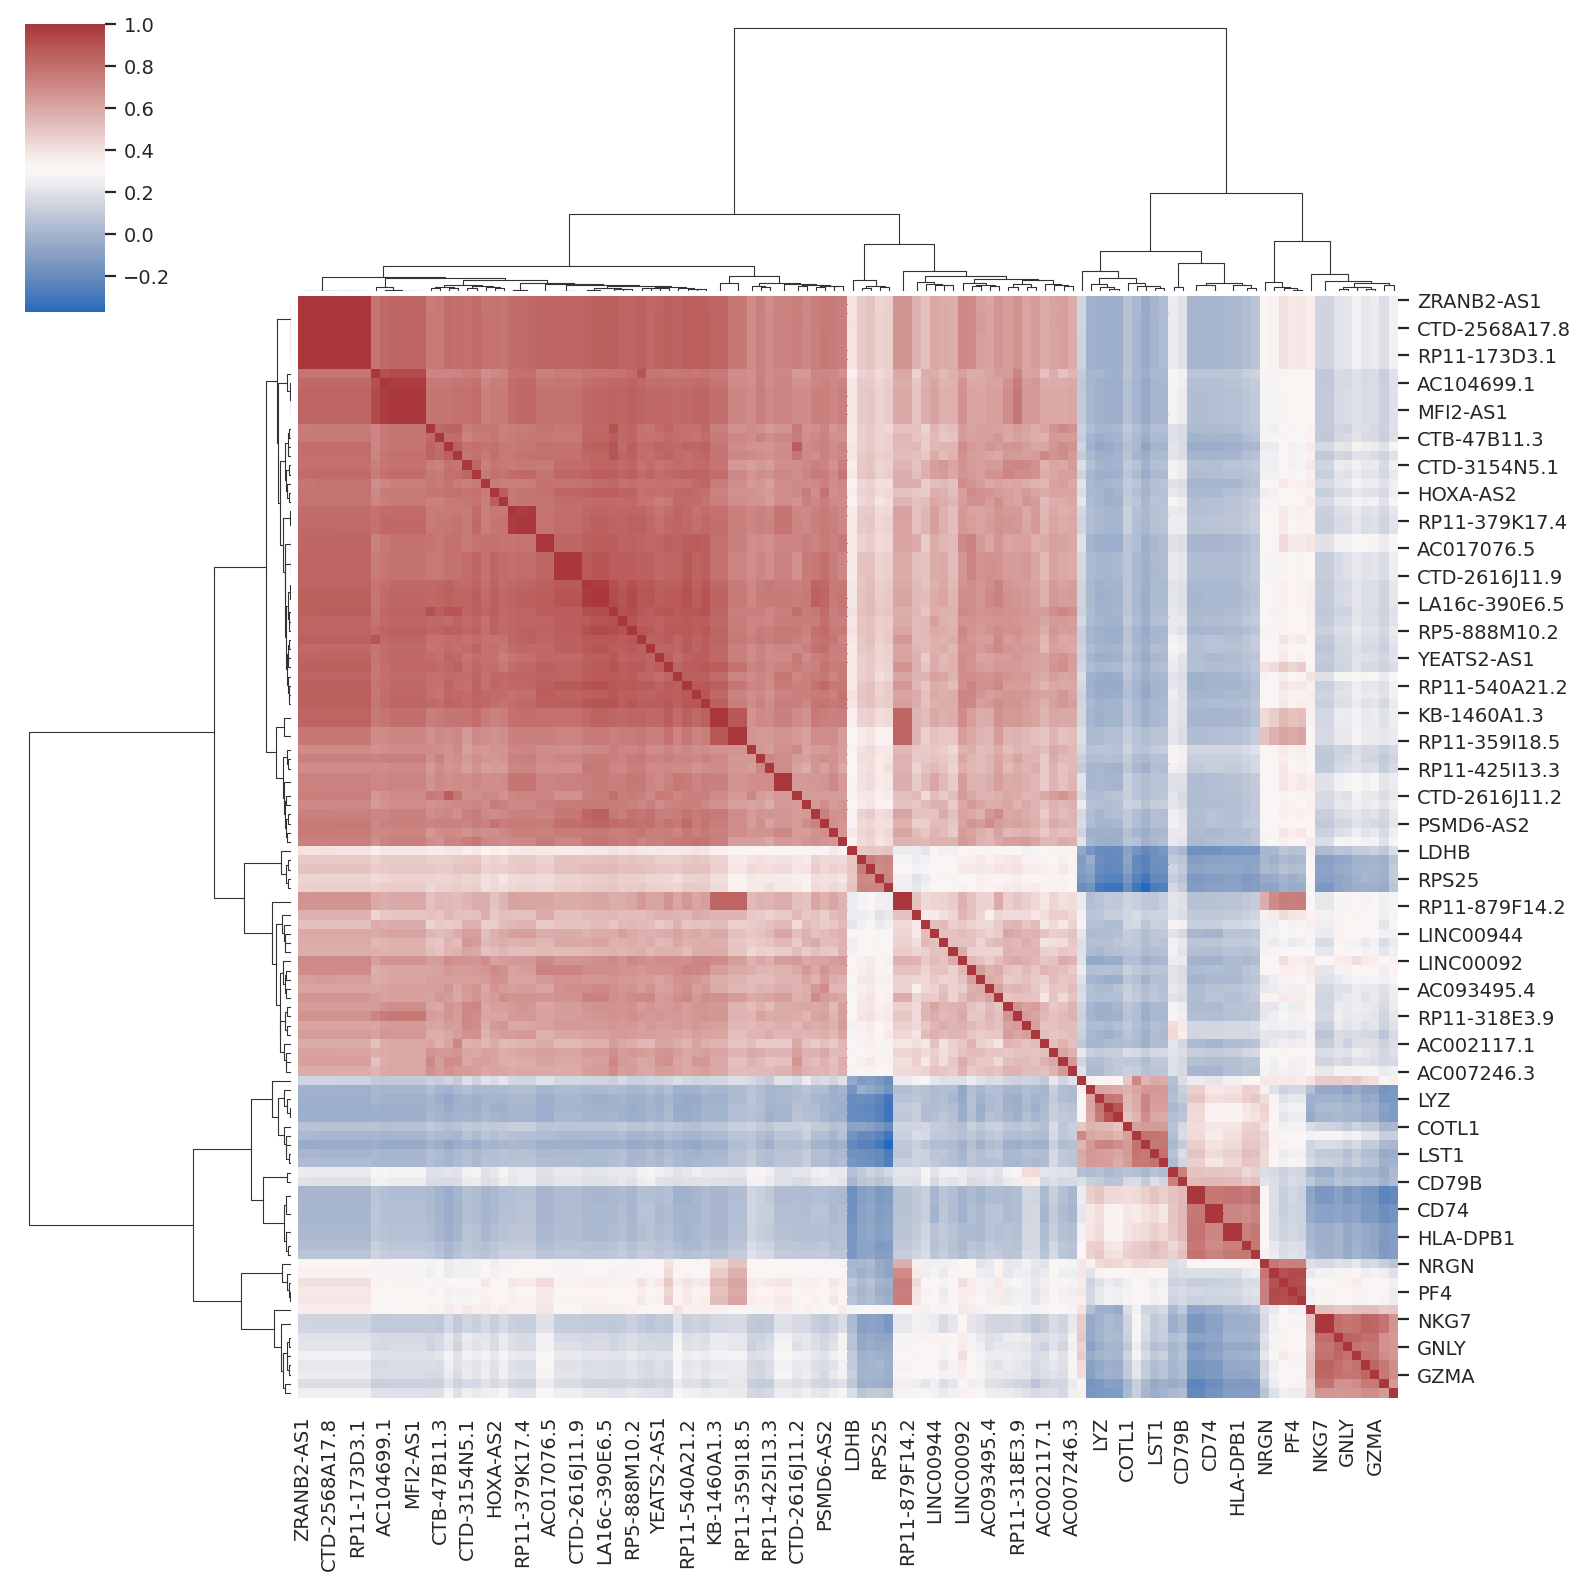

In [ ]:
newCorrMap = newCorrTab.corr(method='spearman') 
rcParams['figure.figsize'] = 10,10
sns.clustermap(newCorrMap, method='ward', cmap='vlag')

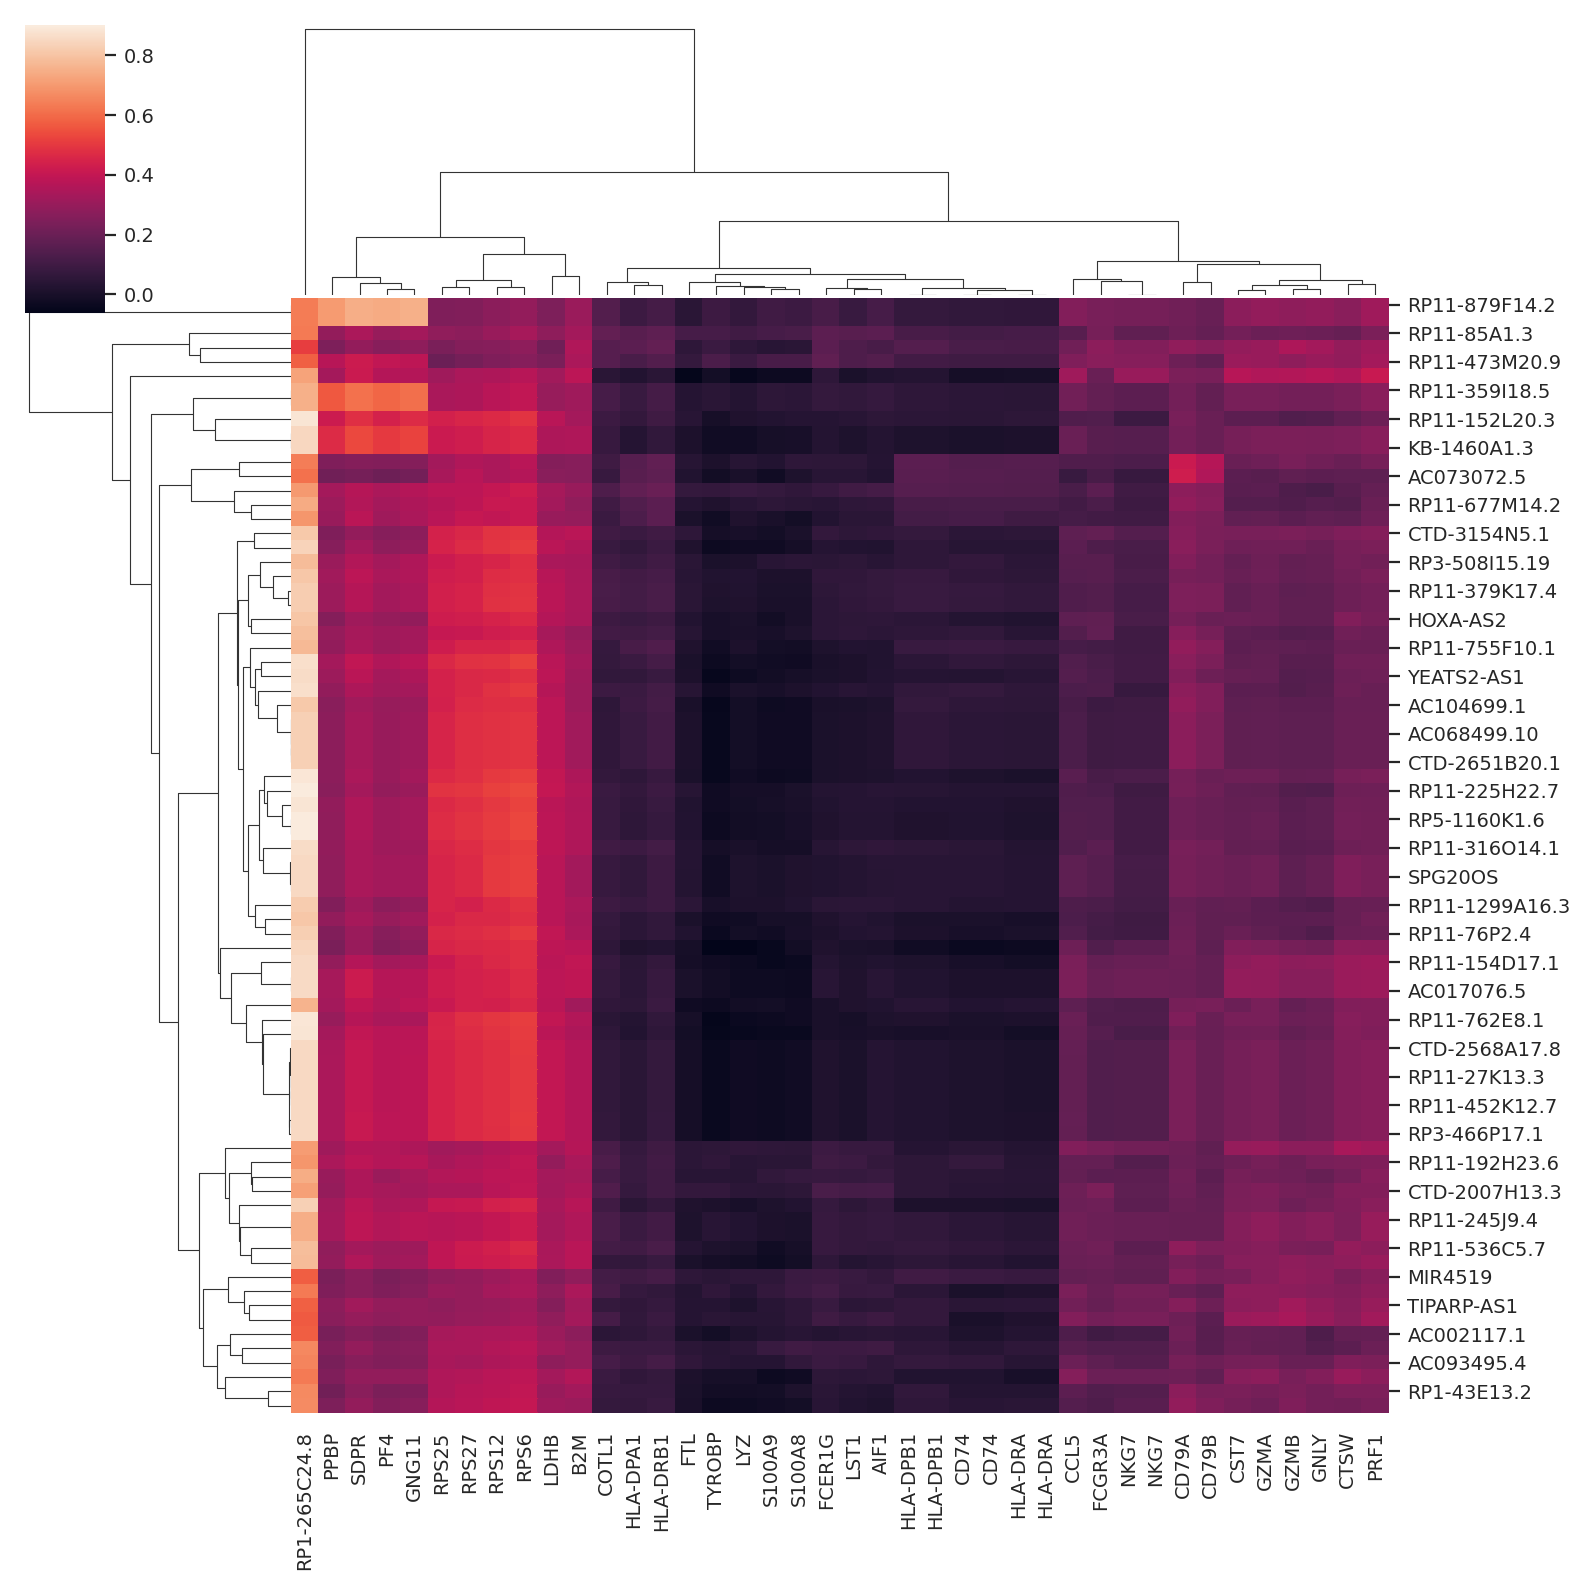

In [ ]:
newPairs = newCorrMap.iloc[0:78,79:119]
sns.clustermap(newPairs)

In [ ]:
import pandas as pd
pd.__version__

'1.1.4'